# Project Python Foundations: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [3]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? 

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are 4 columns recognized as an integer 
* 4 columns were recognized as strings (object) but the rating is one of them, special treatment will be needed. 
* The cost of the order column is a float number as expected. 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [6]:

for column in df.columns:
    if df[df[column]==np.nan].shape[0]>1:
        print(column, " has nissing values")


In [7]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [8]:
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [9]:
df['rating']= df['rating'].replace('Not given',np.nan)

In [10]:
df['rating']=df['rating'].astype(float)
df['rating'].value_counts(normalize=True)

5.0    0.506024
4.0    0.332186
3.0    0.161790
Name: rating, dtype: float64

#### Observations:
There are no missing values, every row has a corresponding value for each column. 
The rating column has values between 'Not given', '5', '3', and '4', which means a mix between String and integers. We can not drop rows with 'Not given' in the rating column due it is 38.8% of the total rows in the dataset. To manage this Not given was changed with NaN and the column type was changed to Float. 


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [187]:
# Write your code here
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
The Minimum time spent preparing the food is 20 minutes, while the maximum is 35 minutes, with an average of 27.37 minutes. 

### **Question 5:** How many orders are not rated?

In [188]:
# Write the code here
df[df['rating'].isna()].shape[0]

736

#### Observations:
736 orders are not rated. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

#### NON NUMERIC VARIABLES

#### 1. RESTAURANT NAME

In [189]:
df['restaurant_name'].unique().shape[0]

178

In [190]:
df['restaurant_name'].value_counts().sort_values(ascending=False).head(3)

Shake Shack          219
The Meatball Shop    132
Blue Ribbon Sushi    119
Name: restaurant_name, dtype: int64

There are 178 restaurants. 
 Shake Shack is the restaurant with more orders followed by The Meatball Shop with 132 orders and Blue Ribbon Sushi with 119 orders. 
 

#### 2. CUISINE TYPE

In [191]:
df.cuisine_type.unique().shape[0]

14

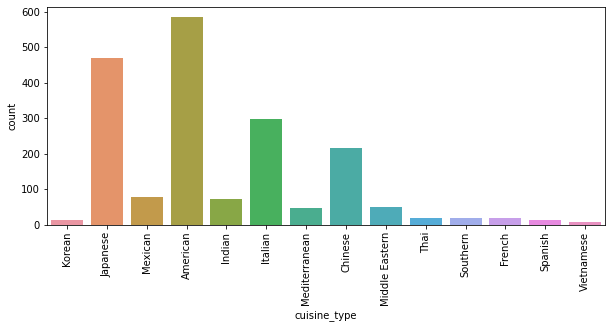

In [192]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

There are 14 different cuisine types where American and Japanese are the most commonly ordered.

#### 3. DAY OF THE WEEK

In [193]:
df.day_of_the_week.unique().shape[0]

2

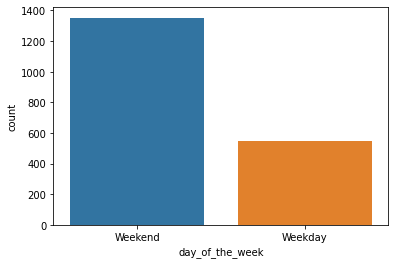

In [194]:
sns.countplot(data=df,x='day_of_the_week');

In [195]:
df['day_of_the_week'].value_counts(normalize=True)

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

As expected, day_of_the_week has 2 different values (Weekend, and Weekday) having Weekend the highest number of orders. 

####  NUMERIC VARIABLES

In [196]:
# Write the code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### 4. ORDER ID

order_id is a numeric variable that identifies every order with a unique number, as we noticed in Questin 3 there aren't missing values.  it is not relevant to make a deep analysis. 

#### 5. CUSTOMER ID

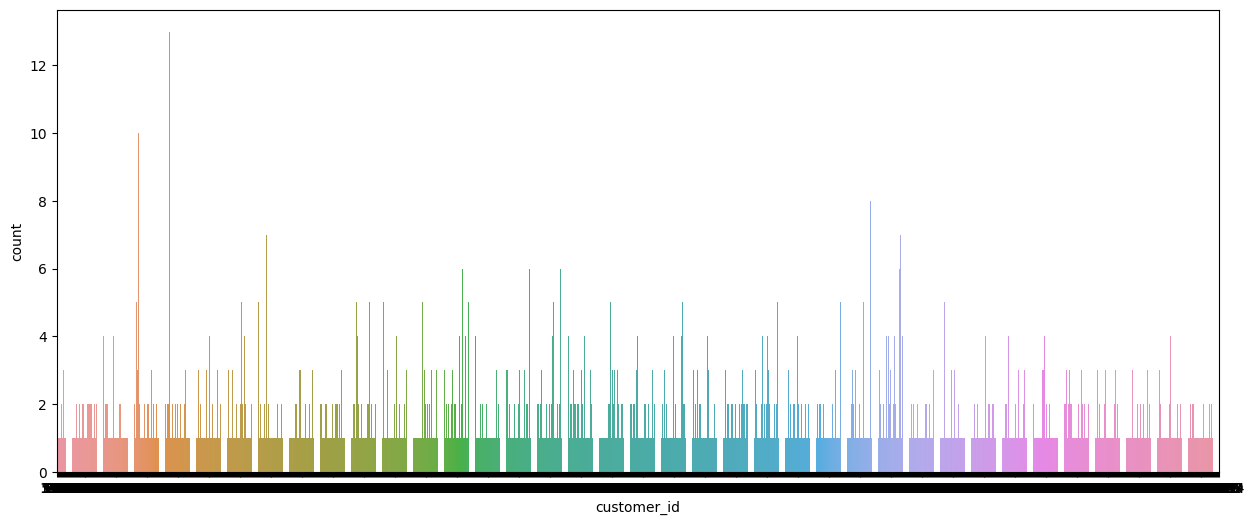

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='customer_id');

In [14]:
df_customers=df.groupby('customer_id').count()[['order_id']].sort_values(by='order_id',ascending=False)
df_customers.rename(columns={'order_id':'orders_placed'},inplace=True)

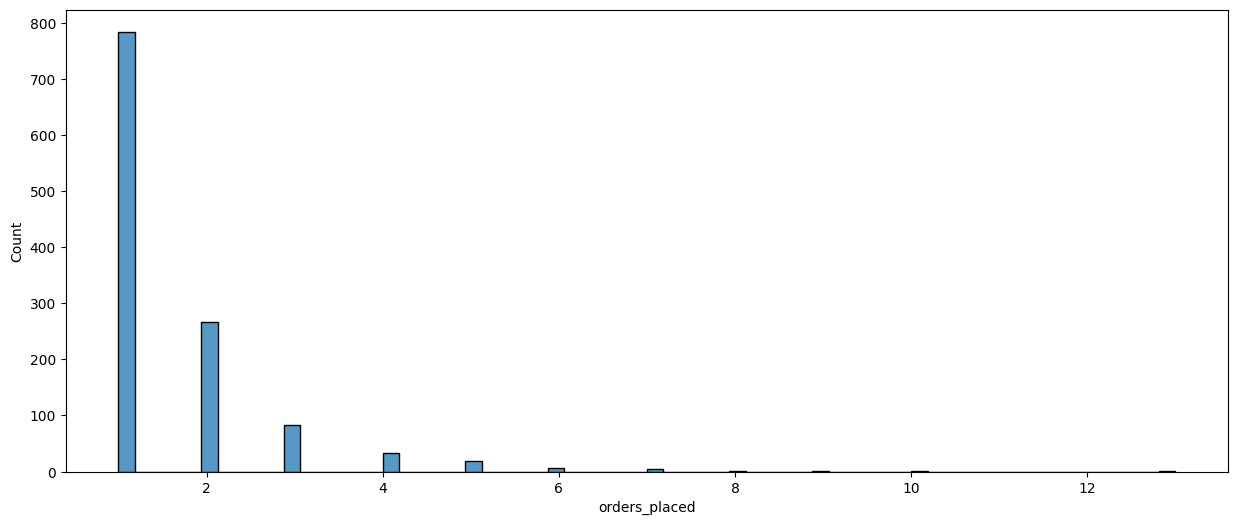

In [15]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_customers,x='orders_placed');

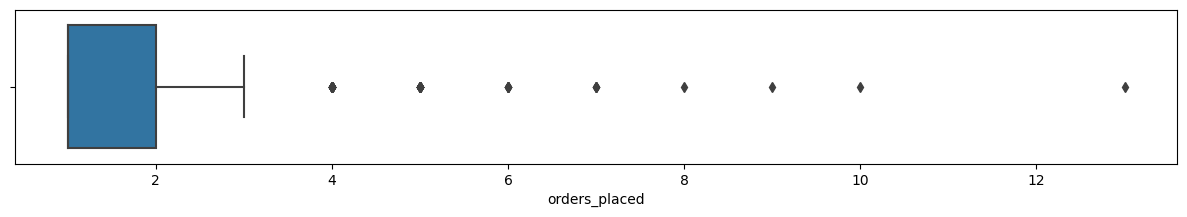

In [21]:
plt.figure(figsize=(15,2))
sns.boxplot(data=df_customers,x='orders_placed');

Customer_id is a numeric variable, by itself it can not give relevant information. However, we can see that there is a customer who has made 13 orders, this being the maximum number, the distribution of number of orders placed by customer is right-skewed. 
75% of customers have placed 2 orders. 

#### 6. COST OF ORDER

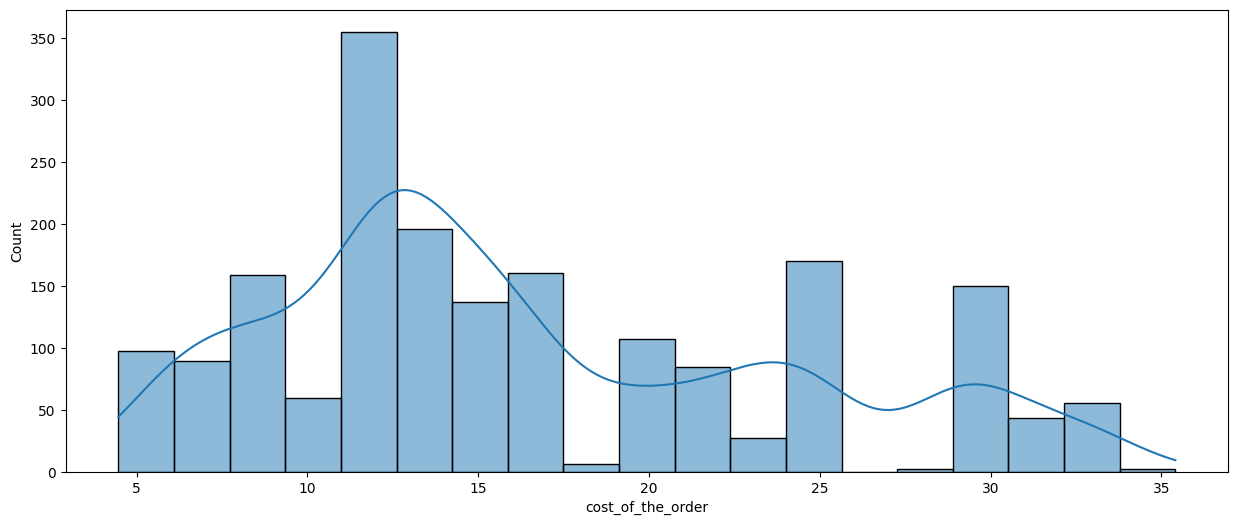

In [17]:

plt.figure(figsize=(15,6))
sns.histplot(data=df,x='cost_of_the_order',kde=True);


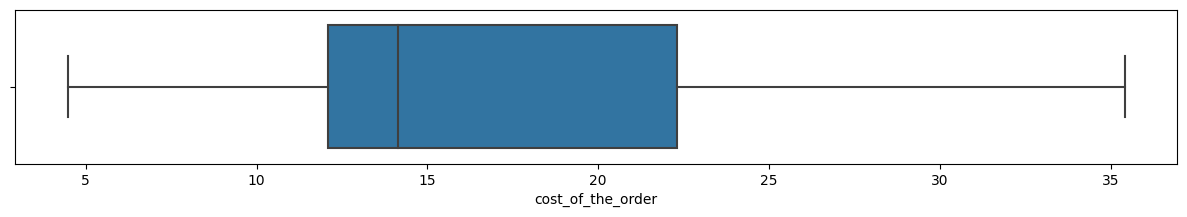

In [20]:
plt.figure(figsize=(15,2))
sns.boxplot(data=df,x='cost_of_the_order');

We can see that cost of order is right-skewed, there are not outliers in the column, 50% of the values are less than $14.14 while the mean is $16.5

#### 7. RATING

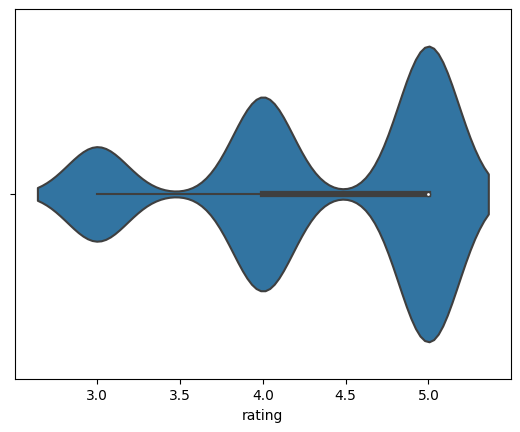

In [24]:

sns.violinplot(data=df,x='rating');

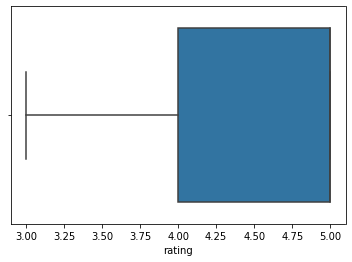

In [245]:
df_rating=df[df['rating'].notna()]
df_rating
sns.boxplot(data=df_rating,x='rating');

Ratings are between 3 and 5, being 5 the value that is repeated the most times, the mean, Q3 and  Q4 have the same value, that is because the distribution of this variable is highly left-skewed. 

#### 8. FOOD PREPARATION TIME

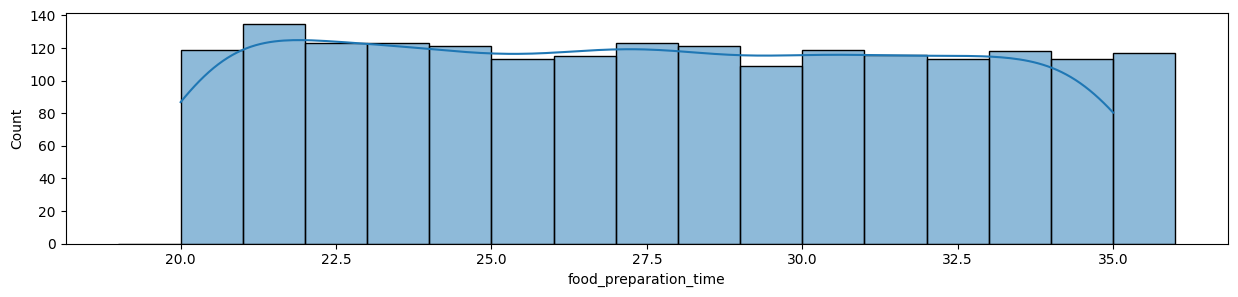

In [26]:
plt.figure(figsize=(15,3))
sns.histplot(data=df,x='food_preparation_time',binrange=[19,36],binwidth=1,kde=True);

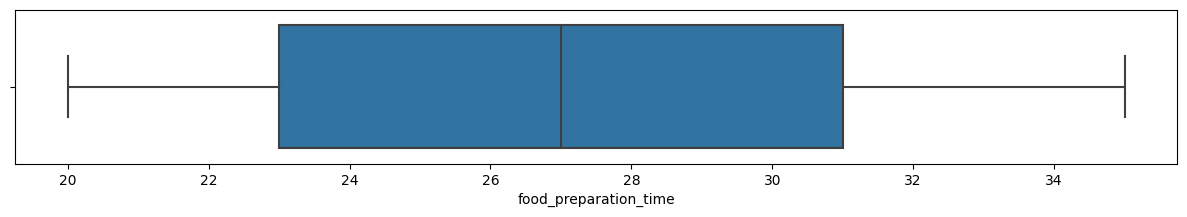

In [28]:
plt.figure(figsize=(15,2))
sns.boxplot(data=df,x='food_preparation_time');

In [207]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

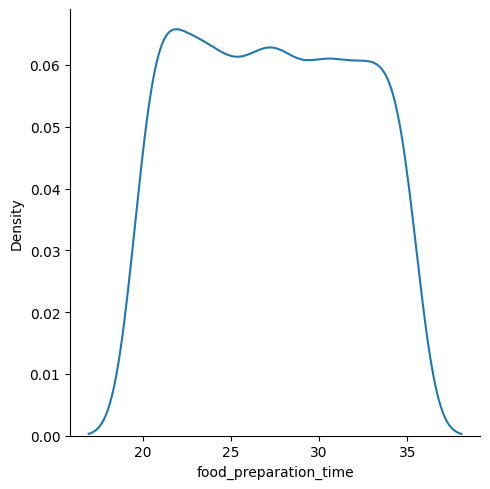

In [34]:

sns.displot(data=df,x='food_preparation_time',kind='kde');


food_preparation_time range is between 20.00 and 35.00  minutes with a mean of 27.00 and median = 27 and a standard deviation of 4.6, with a bimodal distribution.

#### 9. DELIVERY TIME

In [209]:
df.delivery_time.describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

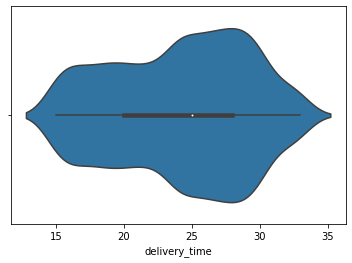

In [210]:
sns.violinplot(data=df,x='delivery_time');

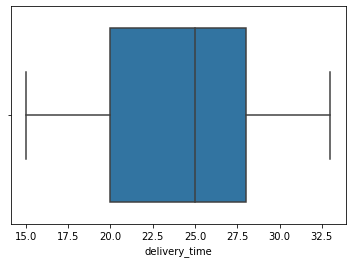

In [211]:
sns.boxplot(data=df,x='delivery_time');

In the graph above we have a left-skewed distribution for the delivery time where 50% of orders are delivered in less than 25 minutes. No outliers were found, which means that there are no orders delivered an atypical time.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?


In [36]:
# Write the code here
df_top5 = df.groupby('restaurant_name').count()[['order_id']].sort_values('order_id',ascending=False).head().reset_index()
df_top5


,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:

The top 5 restaurants are: 
* Shake Shack with 219 orders 
* The Meatball Shop with 132 orders
* Blue Ribbon Sushi with 119 orders
* Blue Ribbon Fired Chicken with 96 orders 
* Parm with 68 orders. 


### **Question 8**: Which is the most popular cuisine on weekends? 

In [37]:
# Write the code here
df.head()
df_weekend = df.loc[df['day_of_the_week']=='Weekend']
df_popular_cusine=df_weekend.groupby('cuisine_type').count()[['day_of_the_week']].sort_values('day_of_the_week',ascending=False).head(1)
df_popular_cusine

,day_of_the_week
cuisine_type,
American,415


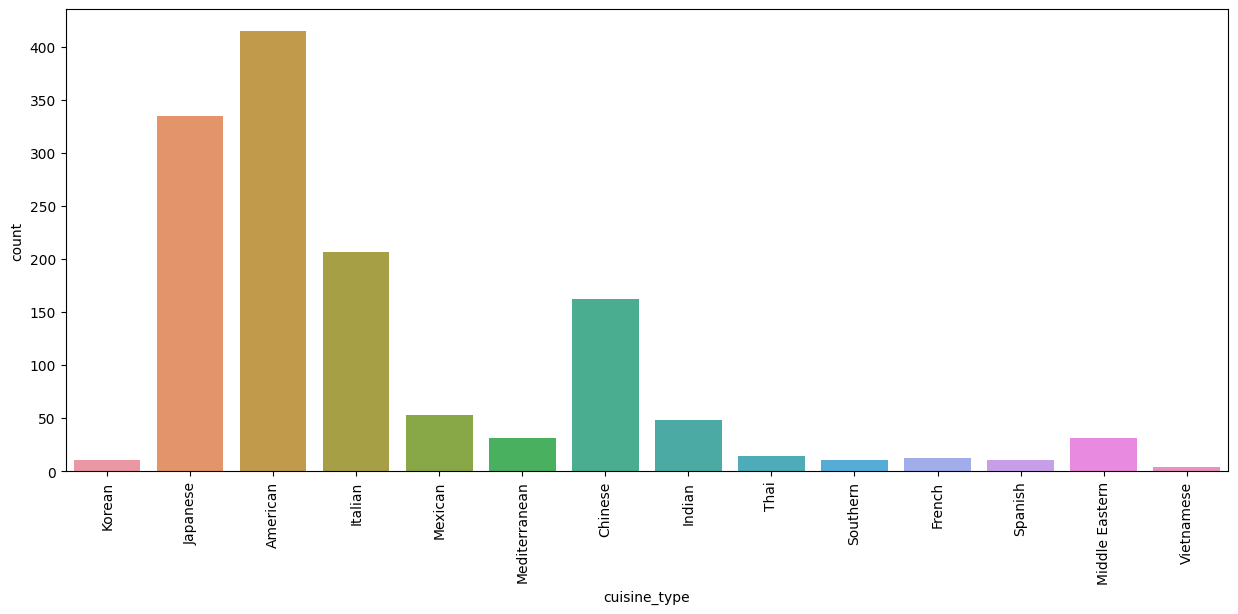

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_weekend,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
The most popular cuisine type on weekends is American with 415 orders. 

### **Question 9**: What percentage of the orders cost more than 20 dollars? 

In [39]:
# Write the code here
print(round(100*df.loc[df.cost_of_the_order>20].shape[0]/df.shape[0],2),'%')

29.24 %


#### Observations:
 29.24% of orders cost more than 20 dollars. 


### **Question 10**: What is the mean order delivery time? 

In [216]:
# Write the code here
df_delivery=df[['order_id','delivery_time','food_preparation_time']].copy()
df_delivery['total_time']=df_delivery['delivery_time']+df['food_preparation_time']
delivery_time = df_delivery.delivery_time.describe()['mean']
total_time=df_delivery.total_time.describe()['mean']
print('delivery time: ',df_delivery.delivery_time.describe()['mean'])
print('Total time: ',df_delivery.total_time.describe()['mean'])
print('Percent: ',delivery_time/total_time)

delivery time:  24.161749209694417
Total time:  51.53371970495258
Percent:  0.46885319647074464


#### Observations:
* The mean time to deliver an order since it is prepared is 24.16 minutes 
* The mean time to deliver an order since it is placed is 51.53 minutes. 
* On average the 46.9% of the time is spent in the delivery process. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [217]:
# Write the code hereThe mean delivery time is
df['customer_id'].value_counts().sort_values(ascending=False).head(5)


52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
The most frequent customer ids are:
* 52832 with 13 orders
* 47440 with 10 orders
* 83287 with 9 orders
* 250494 with 8 orders
* 259341 with 7 orders

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


#### Multivariate Analysis

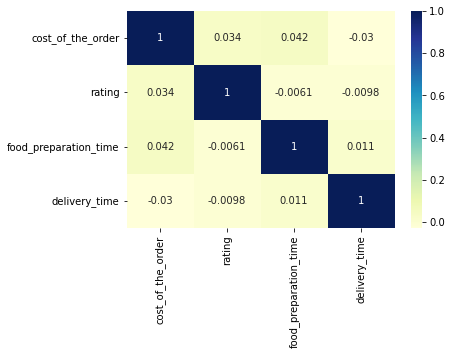

In [218]:
# Write the code here
sns.heatmap(data=df[['cost_of_the_order','rating','food_preparation_time','delivery_time']].corr(),annot=True, cmap='YlGnBu');

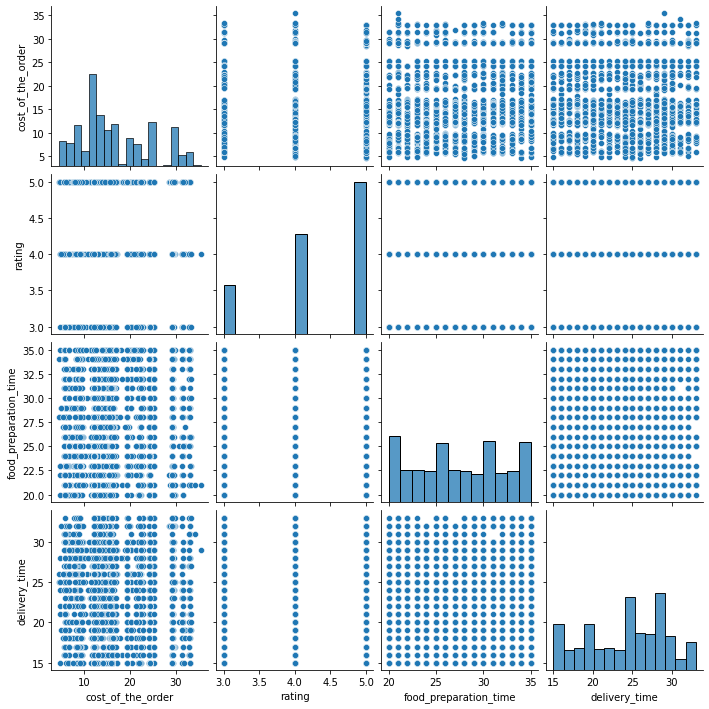

In [219]:
sns.pairplot(data=df[['cost_of_the_order','rating','food_preparation_time','delivery_time']]);

#### Observations 
* There is no significant correlation between numeric values.

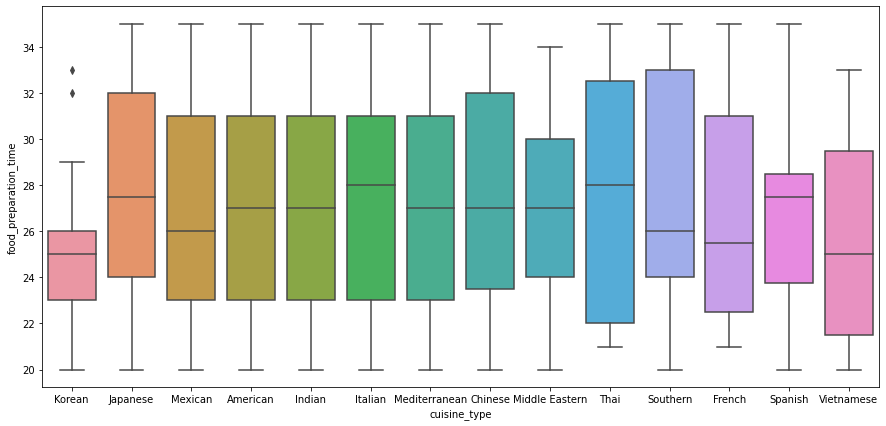

In [246]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time');

* 75% of Korean food is prepared in less than 26 minutes. 
* 50% of Mexican, American, Indian, Italian Mediterranean, and Frech food has similar time preparation from 23 to 31 minutes. 
* 25 % of Korean, Mexican, American, Indian, Italian, and Mediterranean takes less than 23 minutes in preparation. 

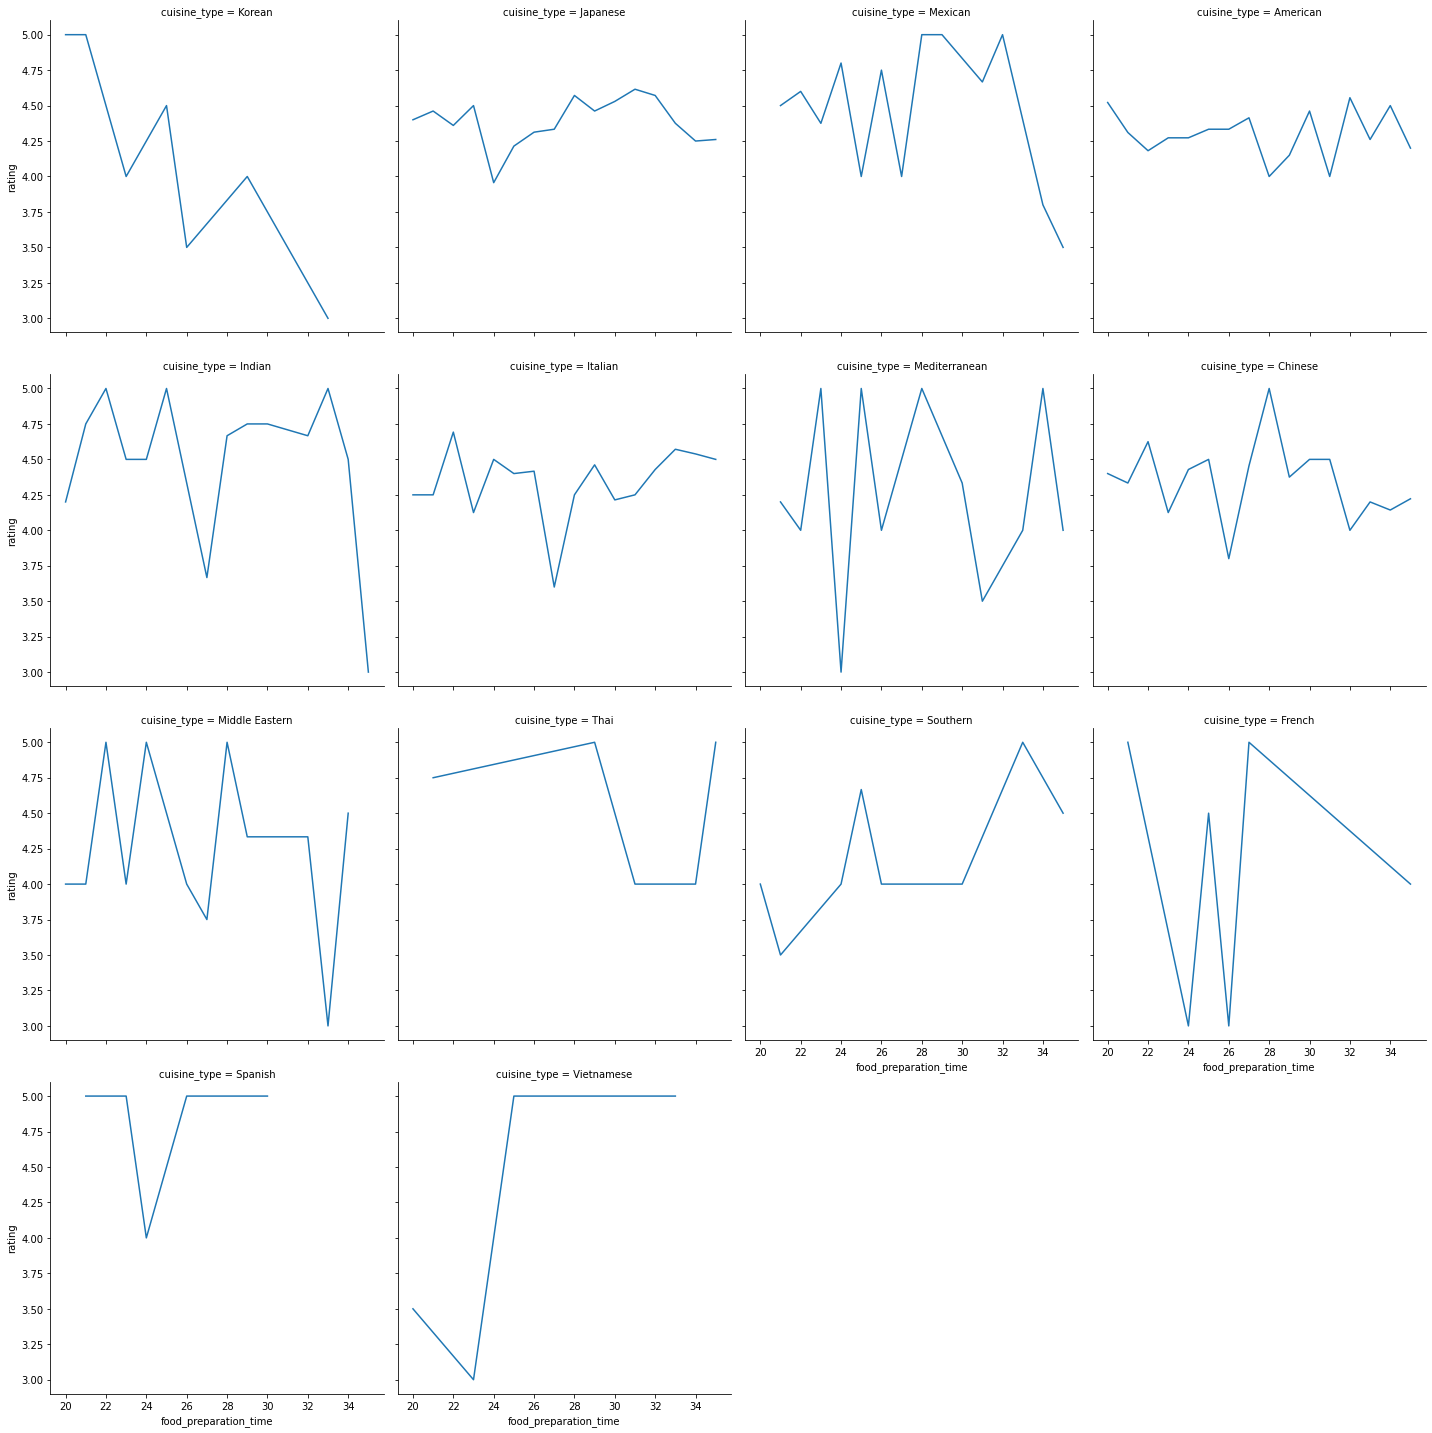

In [221]:
sns.relplot(data=df,x='food_preparation_time',y='rating',col='cuisine_type',kind='line', ci=None, col_wrap=4);



* Japanese, American, Italian, and Chinese food ratings have no significant variation and we can say that it remains stable.  

* Mexican, French, and Italian food ratings show a high dispersion with a tendency to drop rapidly at higher preparation times

* Spanish, Vietnamese, and Tai food ratings are the best with higest preparation time. 

In [222]:
df_time = df.copy()
df_time['total_time']=df['food_preparation_time']+df['delivery_time']
df_time.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


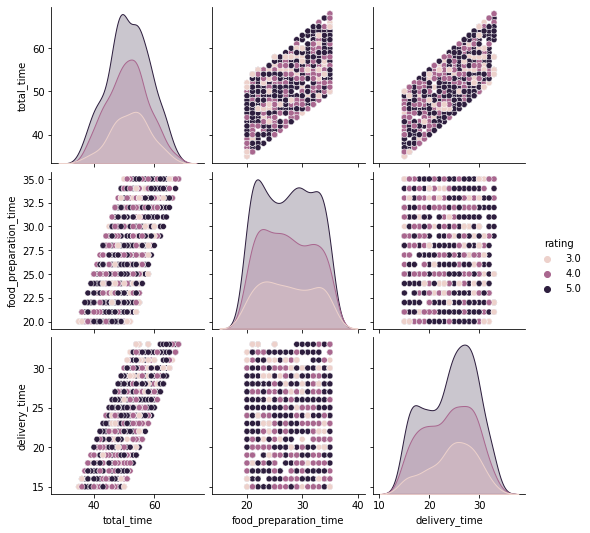

In [223]:
sns.pairplot(data=df_time,vars=['total_time','food_preparation_time','delivery_time'],hue='rating');

In [224]:
df_time[['total_time','food_preparation_time','delivery_time','rating']].corr()

,total_time,food_preparation_time,delivery_time,rating
total_time,1.000000,0.685970,0.735195,-0.011348
food_preparation_time,0.685970,1.000000,0.011094,-0.006083
delivery_time,0.735195,0.011094,1.000000,-0.009804
rating,-0.011348,-0.006083,-0.009804,1.000000


Total time is calculated as de summation of food_preparation_time and delivery_time, as expected, the correlation between those variables is considerable and we can notice that the delivery time affects the total time to a greater extent
Total time has a normal distribution. 

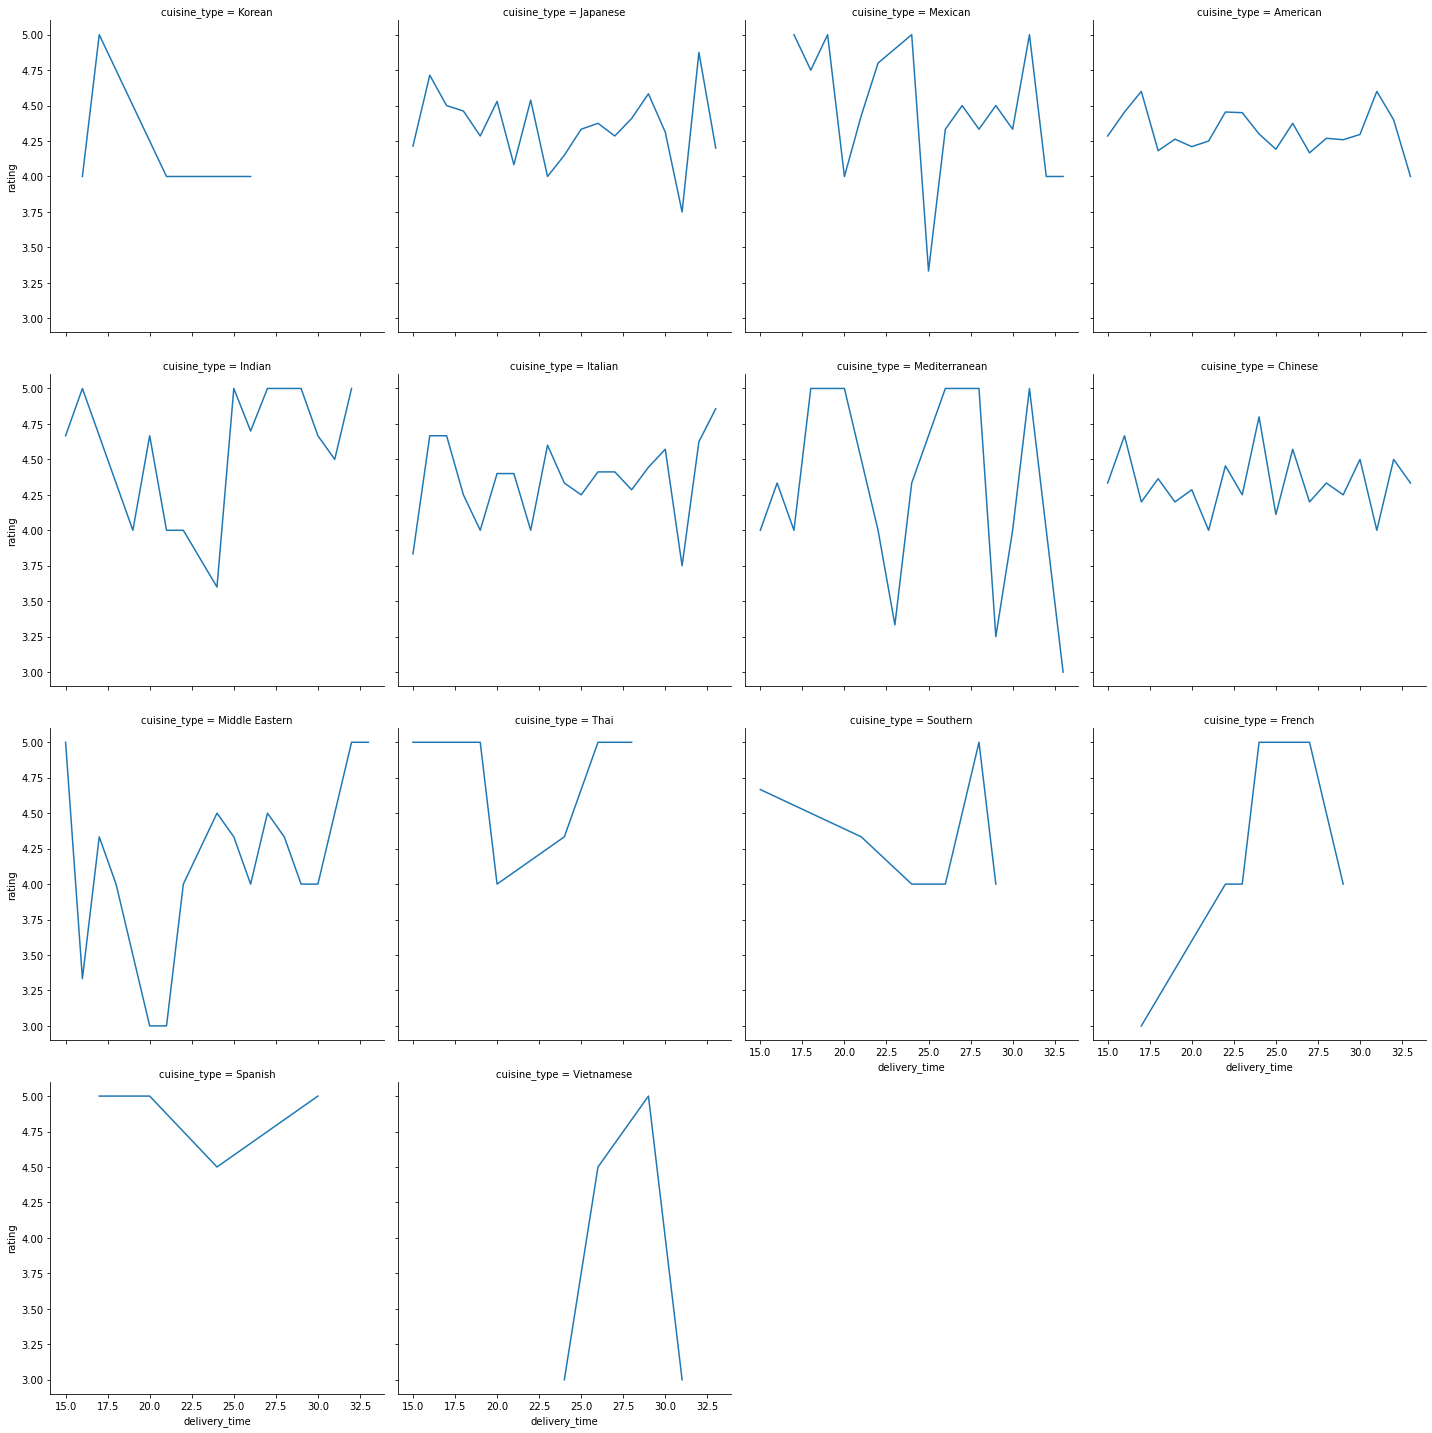

In [225]:
sns.relplot(data=df,x='delivery_time',y='rating',col='cuisine_type',kind='line', ci=None, col_wrap=4);

* Korean and Spanish food rating remains stable. 
* Eastern food rating has maximum values in the minimum and maximum delivery time. 
* French food rating increases

In [226]:
df_time[['total_time','rating']].corr()

,total_time,rating
total_time,1.000000,-0.011348
rating,-0.011348,1.000000


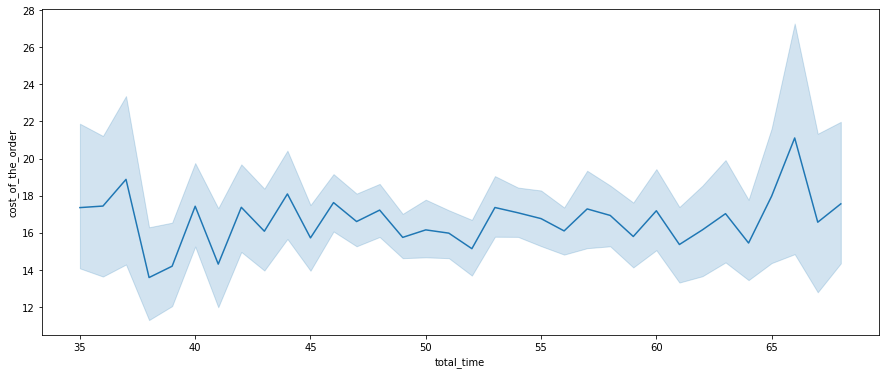

In [247]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_time, x='total_time', y='cost_of_the_order');

The mean cost of the order remains stable in relation to the total time, with a marked increase after 65 minutes

In [228]:
df_time.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
total_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00


Creating bins for total time. 
A delivery is considered fast if is done between 35 and 46 minutes, normal between 46 and 57 minutes, and slow if it is between 57 and 69 minutes. 

In [229]:
#Creating bins for total_time 
df_time['Time_bin']=pd.cut(df_time['total_time'],bins=[35,46,57,69],labels=['Fast','Normal','Slow'], right = False)

In [230]:
df_time_bin=df_time.groupby(['restaurant_name','Time_bin']).count()['order_id'].reset_index()
df_time_bin.head()

,restaurant_name,Time_bin,order_id
0,'wichcraft,Fast,0
1,'wichcraft,Normal,1
2,'wichcraft,Slow,0
3,12 Chairs,Fast,0
4,12 Chairs,Normal,2


In [231]:
df_time_bin[df_time_bin['Time_bin']=='Fast'].sort_values(by='order_id',ascending=False).head(10)

,restaurant_name,Time_bin,order_id
408,Shake Shack,Fast,30
63,Blue Ribbon Sushi,Fast,24
459,The Meatball Shop,Fast,22
60,Blue Ribbon Fried Chicken,Fast,17
363,RedFarm Broadway,Fast,15
435,TAO,Fast,15
198,Han Dynasty,Fast,13
66,Blue Ribbon Sushi Bar & Grill,Fast,12
366,RedFarm Hudson,Fast,12
309,Nobu Next Door,Fast,9


Below table show top 10 restaurants with fastest deliveries. 

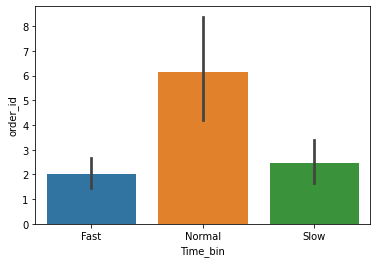

In [248]:
sns.barplot(data=df_time_bin,x='Time_bin',y='order_id');

Most orders are delivered in normal time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [233]:
# Write the code here
df_rating = df.loc[df['rating'].notna()]
df_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3.0,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19


In [234]:
df_rating_count=df_rating.groupby('restaurant_name').count()[['rating']].sort_values('rating',ascending=False).reset_index()
df_rating_count.rename(columns={'rating':'rating_count'},inplace=True)
df_rating_count


,restaurant_name,rating_count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [235]:
df_rating_count=df_rating_count.loc[df_rating_count['rating_count']>50]
df_rating_count

,restaurant_name,rating_count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [236]:
df_rating_avg=df_rating.groupby('restaurant_name').mean()[['rating']].reset_index()
df_rating_avg

,restaurant_name,rating
0,'wichcraft,5.000000
1,12 Chairs,4.500000
2,5 Napkin Burger,4.000000
3,67 Burger,5.000000
4,Amma,4.500000
...,...,...
151,Zero Otto Nove,4.000000
152,brgr,3.000000
153,da Umberto,5.000000
154,ilili Restaurant,4.153846


In [237]:
df_rating_count.merge(df_rating_avg,how='left',on='restaurant_name')

,restaurant_name,rating_count,rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
There are 5 restaurants with a rating count of more than 50 and an average rating greater than 4. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [238]:
# Write the code here
df['revenue']=0

for index, order in df.iterrows():
    if order['cost_of_the_order']>20:
        df.loc[index,'revenue']=order['cost_of_the_order']*.25
    elif order['cost_of_the_order']>5:
        df.loc[index,'revenue']=order['cost_of_the_order']*.15
df['revenue'].sum()

6166.303

In [239]:
df.loc[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20) ]['cost_of_the_order'].sum()*.15+df.loc[(df['cost_of_the_order']>20) ]['cost_of_the_order'].sum()*.25

6166.303

#### Observations:
Total revenue is  $ 6166.30. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [240]:
# Write the code here
df_delivery[df_delivery['total_time']>60].shape[0] / df.shape[0]

0.1053740779768177

#### Observations:
10.54 % of the orders are delivered in more than 60 minutes. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [241]:
# Write the code here
df.head()
df.groupby('day_of_the_week').mean()[['delivery_time','food_preparation_time']]

,delivery_time,food_preparation_time
day_of_the_week,,
Weekday,28.340037,27.212066
Weekend,22.470022,27.436714


#### Observations:
The delivery time on weekdays is 28.34 minutes on average, while on weekends is 22.47 minutes. It means that on weekends delivering process is faster than on weekdays. On other hand  food preparation time is greater on weekends by 0.22 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) 

### Conclusions:
* The most demanded food is American, Japanese and Italian 

* The higher the food preparation times, the lower the score that customers give in the application

* The total time from order request to delivery is mostly affected by delivery time.

* The delivery time on weekdays is greater than the delivery time on weekends. The available data does not allow determining what is the cause of this variation. One of the possibilities is the traffic, however, this would require an additional analysis with more information.

* 50% of the orders that were rated received a rating of 5 and 33% received a rating of 4, this shows that customers are satisfied with the services.

* The largest number of negative ratings are grouped on weekends even when the speed of delivery is higher.

* 75% of the clients have placed only 2 orders. 

* The largest number of orders have been registered on weekends, only 28% of orders have been received during the week

### Recommendations:

*  The company should encourage its customers to register ratings for their orders through promotions.

* Include in the rating an option that allows to find out the client's motivation is to determine the factors that affect client satisfaction.

* Since it is not possible to estimate the causes of a negative or positive rating, it is necessary to include an option in the ratings that allows determining why the client has given his rating.

* The application must include a service level agreement (SLA) that shows the customers the average time it will take for their order to be delivered to improve the user experience.

* It is necessary to implement discounts or promotions so that customers who have registered few orders continue to use the application and generate greater demand.

* It is necessary to develop strategies to increase the number of orders received on weekdays.

---